In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import collections

%matplotlib inline
plt.style.use('ggplot')

In [2]:
!pwd

/home/ntran/galvanize/UCM_Bus_Simulator


In [3]:
filename = '219-CATTRACKS Fall 2019- February Billing.xlsx'

xlsx_df = pd.ExcelFile(filename)
xlsx_df.sheet_names

['CAT BILL',
 'FARES',
 'DELAYS',
 'BIKES',
 'C1 BLUE',
 'C1-GOLD',
 'C2 - EXPRESS',
 'SAT-SUN E1-LINE DOWNTOWN',
 'E1 HOLIDAY',
 'SAT-SUN E2-LINE HOUSING',
 'E2 HOLIDAY',
 'Fastcat',
 'G-Line',
 'Heritage 1 ',
 'Heritage 2',
 'SAT-SUND HERITAGE',
 'FR-SAT NITECAT',
 'PAX LEFT',
 'STANDBY',
 'AB LINE',
 'E-Line']

In [4]:
'''

Based on assessment of csv data, most informative sheets in workbook consist of these bus lines:
 'C1 BLUE',
 'C1-GOLD',
 'C2 - EXPRESS',
 'G-Line'

Will only read those sheets into a pandas df
And then into a dictionary to track of the bus line and its total load data

'''

"\n\nBased on assessment of csv data, most informative sheets in workbook consist of these bus lines:\n 'C1 BLUE',\n 'C1-GOLD',\n 'C2 - EXPRESS',\n 'G-Line'\n\nWill only read those sheets into a pandas df\nAnd then into a dictionary to track of the bus line and its total load data\n\n"

In [5]:
use_sheets = ['C1 BLUE', 'C1-GOLD', 'C2 - EXPRESS', 'G-Line']
df_names = ['c1_blue', 'c1_gold', 'c2_exp', 'g_line']

df_dicts = {}
for i in range(len(df_names)):
    df_dicts[df_names[i]] = pd.read_excel(filename, use_sheets[i])

In [6]:
# Hate that I am doing this brute force, but didn't know how to grab these totals otherwise:
# Want an ordered dictionary since I am using brute means to slice data

collections.OrderedDict(df_dicts)
df_dicts.keys()


# Slices obtained through visual analysis and trial and error. Will not be able to 
# get away with doing this on a larger data set

c1_blue = df_dicts['c1_blue'].iloc[4:25, 86:101]
c1_gold = df_dicts['c1_gold'].iloc[4:25, 81:95]
c2_exp = df_dicts['c2_exp'].iloc[4:19, 106:125]
g_line = df_dicts['g_line'].iloc[4:17, 101:119]

# Step above removed use of dictionaries. Just dfs now

print(type(g_line))

<class 'pandas.core.frame.DataFrame'>


In [7]:
# Only c1_blue and c1_gold lines have Nans in first column.
# c2_exp, g_line do not have Nans in first column

nans_lst = [c1_blue, c1_gold]

for df in nans_lst:
    df.dropna(inplace=True)
    print(df)

               Unnamed: 86  Unnamed: 87 Unnamed: 88  Unnamed: 89  Unnamed: 90  \
4            C1 Blue -Line        545.0         704        843.0       1002.0   
5           Granville Apts          0.0          31         61.0         41.0   
6                  Walmart          0.0           0          1.0          0.0   
7        Meadows/Olivewood          0.0          29         39.0         29.0   
8       Alexander & "G" St          2.0          24         50.0         38.0   
9        Rite Aid/Walgreen          2.0          19         84.0         31.0   
10         El Portal Plaza          0.0          21         42.0         37.0   
11          Mercy Hospital          3.0           0          0.0          2.0   
12           Arrow Wood Dr         11.0         194        303.0        116.0   
13               Muir Pass          5.0           2         85.0        124.0   
14       Scholars/Emigrant          1.0           1          7.0         13.0   
15   TriCol/Mercy Hospital  

In [8]:
# These two columns did not contain any data. 
# Not sure why they are there to begin with. Removed them.

c2_exp = c2_exp.drop(columns=['Unnamed: 123'])
g_line = g_line.drop(columns=['Unnamed: 117'])

# print(c2_exp), print(g_line)

In [9]:
# Check that these are the columns to plot in a bar graph

print(c1_blue.iloc[1:, 0])
c1_blue.iloc[1:, -1]

5             Granville Apts
6                    Walmart
7          Meadows/Olivewood
8         Alexander & "G" St
9          Rite Aid/Walgreen
10           El Portal Plaza
11            Mercy Hospital
12             Arrow Wood Dr
13                 Muir Pass
14         Scholars/Emigrant
15     TriCol/Mercy Hospital
16    El Portal Plaza/"G" St
17        "G" St & Alexander
18         Meadows/Olivewood
19                   Walmart
20            Granville Apts
24                     TOTAL
Name: Unnamed: 86, dtype: object


5      251
6       27
7      160
8      220
9      253
10     210
11      19
12     937
13    1893
14     223
15       7
16      16
17      32
18      18
19      38
20       0
24    4304
Name: Unnamed: 100, dtype: object

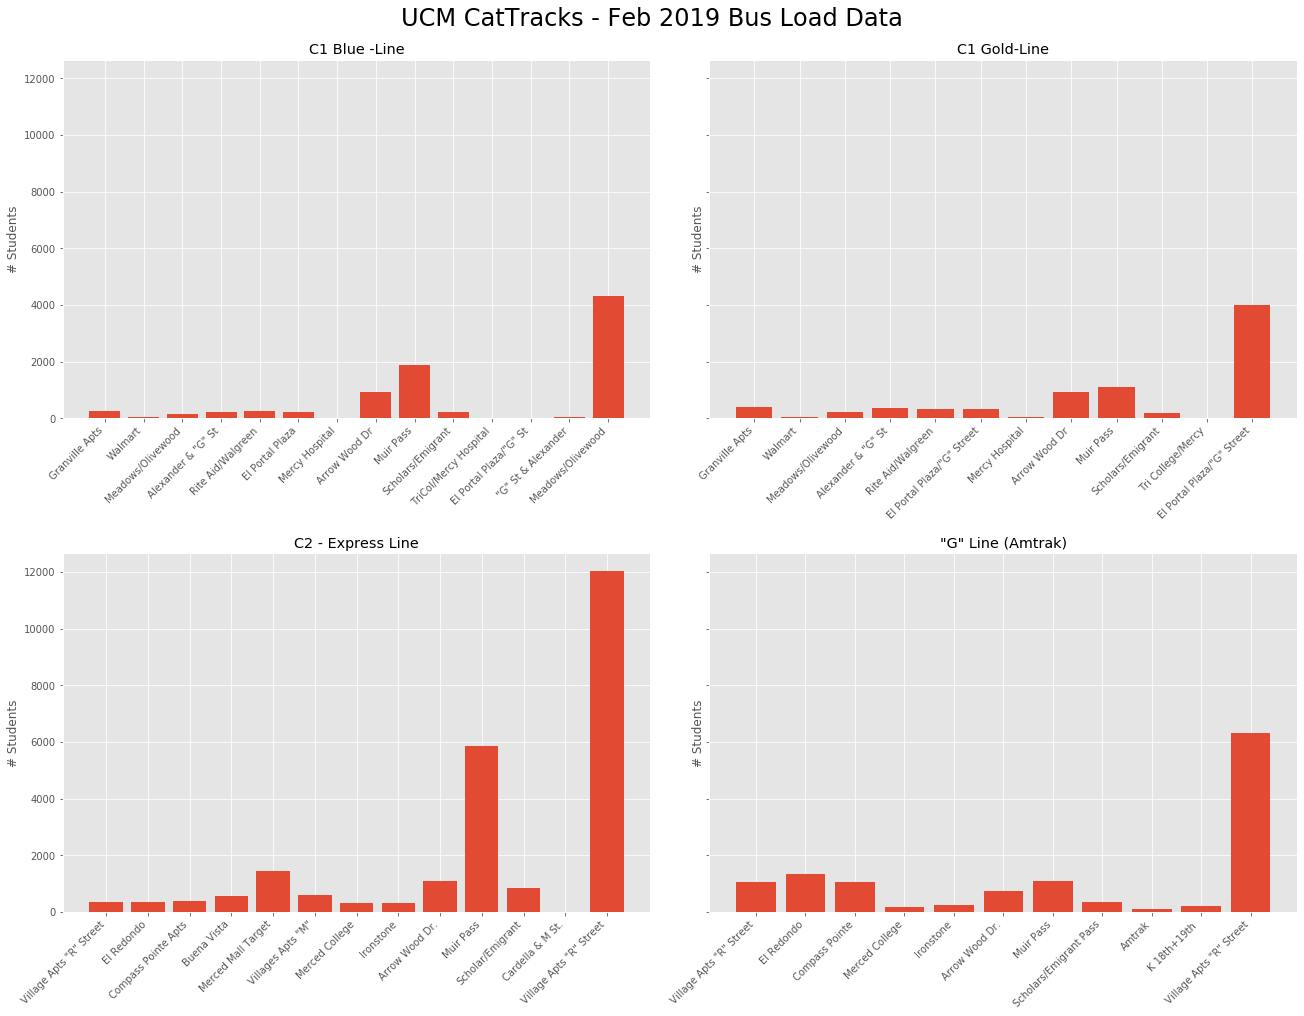

In [10]:
dfs_lst = [c1_blue, c1_gold, c2_exp, g_line]
c1_blue.iloc[1:, 0]
c1_blue.iloc[1:, -1]

fig, axs = plt.subplots(2,2, figsize = (18,14), sharey=True, constrained_layout=True)
for i, ax in enumerate(axs.flat):
    ax.bar(dfs_lst[i].iloc[1:, 0], dfs_lst[i].iloc[1:, -1])
    ax.set_xticklabels(labels=dfs_lst[i].iloc[1:, 0], rotation=45, ha='right')
    ax.set_title(dfs_lst[i].iloc[0,0])
    ax.set_ylabel('# Students')

fig.suptitle('UCM CatTracks - Feb 2019 Bus Load Data', fontsize=24)
fig.savefig('2019-feb-plot.png')

In [11]:
c1_blue

,Unnamed: 86,Unnamed: 87,Unnamed: 88,Unnamed: 89,Unnamed: 90,Unnamed: 91,Unnamed: 92,Unnamed: 93,Unnamed: 94,Unnamed: 95,Unnamed: 96,Unnamed: 97,Unnamed: 98,Unnamed: 99,Unnamed: 100
4,C1 Blue -Line,545.0,704,843.0,1002.0,1121,1300,1419.0,1558,1717.0,1836.0,2015.0,2134.0,2328.0,TOTAL
5,Granville Apts,0.0,31,61.0,41.0,40,17,22.0,12,8.0,13.0,5.0,1.0,0.0,251
6,Walmart,0.0,0,1.0,0.0,0,2,6.0,5,2.0,3.0,3.0,5.0,0.0,27
7,Meadows/Olivewood,0.0,29,39.0,29.0,11,8,12.0,11,10.0,7.0,1.0,3.0,0.0,160
8,"Alexander & ""G"" St",2.0,24,50.0,38.0,48,14,20.0,8,9.0,3.0,1.0,3.0,0.0,220
9,Rite Aid/Walgreen,2.0,19,84.0,31.0,25,21,31.0,10,9.0,19.0,2.0,0.0,0.0,253
10,El Portal Plaza,0.0,21,42.0,37.0,63,19,11.0,3,1.0,10.0,2.0,0.0,1.0,210
11,Mercy Hospital,3.0,0,0.0,2.0,2,2,3.0,4,0.0,2.0,1.0,0.0,0.0,19
12,Arrow Wood Dr,11.0,194,303.0,116.0,99,49,29.0,34,49.0,31.0,13.0,7.0,2.0,937
13,Muir Pass,5.0,2,85.0,124.0,113,230,334.0,354,359.0,163.0,77.0,37.0,10.0,1893


In [12]:
c1_gold

,Unnamed: 81,Unnamed: 82,Unnamed: 83,Unnamed: 84,Unnamed: 85,Unnamed: 86,Unnamed: 87,Unnamed: 88,Unnamed: 89,Unnamed: 90,Unnamed: 91,Unnamed: 92,Unnamed: 93,Unnamed: 94
4,C1 Gold-Line,625,744.0,923.0,1042.0,1201,1340,1459,1638.0,1757.0,1916.0,2055.0,2214.0,TOTAL
5,Granville Apts,31,68.0,115.0,56.0,57,39,28,6.0,5.0,3.0,1.0,0.0,409
6,Walmart,2,0.0,2.0,3.0,3,0,1,2.0,1.0,0.0,0.0,0.0,14
7,Meadows/Olivewood,14,45.0,60.0,27.0,26,11,17,7.0,15.0,2.0,3.0,3.0,230
8,"Alexander & ""G"" St",52,63.0,57.0,89.0,53,18,28,8.0,2.0,1.0,1.0,1.0,373
9,Rite Aid/Walgreen,32,88.0,47.0,39.0,46,19,15,8.0,9.0,5.0,1.0,2.0,311
10,"El Portal Plaza/""G"" Street",26,110.0,76.0,41.0,49,9,16,10.0,3.0,0.0,0.0,0.0,340
11,Mercy Hospital,5,4.0,4.0,1.0,1,10,1,0.0,4.0,0.0,0.0,0.0,30
12,Arrow Wood Dr,81,234.0,136.0,216.0,90,77,28,36.0,11.0,13.0,3.0,3.0,928
13,Muir Pass,23,12.0,44.0,57.0,83,116,205,259.0,138.0,103.0,74.0,0.0,1114


In [13]:
c2_exp

,Unnamed: 106,Unnamed: 107,Unnamed: 108,Unnamed: 109,Unnamed: 110,Unnamed: 111,Unnamed: 112,Unnamed: 113,Unnamed: 114,Unnamed: 115,Unnamed: 116,Unnamed: 117,Unnamed: 118,Unnamed: 119,Unnamed: 120,Unnamed: 121,Unnamed: 122,Unnamed: 124
4,C2 - Express Line,525.0,625.0,745.0,845.0,945,1105.0,1205.0,1305,1425.0,1525.0,1625,1745.0,1845.0,1945.0,2045.0,2205.0,TOTAL
5,"Village Apts ""R"" Street",3.0,7.0,49.0,67.0,47,55.0,19.0,13,12.0,11.0,6,8.0,12.0,5.0,14.0,6.0,334
6,El Redondo,4.0,25.0,39.0,47.0,38,67.0,38.0,22,35.0,14.0,12,6.0,5.0,7.0,0.0,3.0,362
7,Compass Pointe Apts,2.0,27.0,79.0,44.0,53,70.0,35.0,7,19.0,7.0,9,5.0,2.0,6.0,2.0,1.0,368
8,Buena Vista,10.0,44.0,98.0,100.0,87,59.0,41.0,30,24.0,30.0,11,10.0,10.0,2.0,0.0,1.0,557
9,Merced Mall Target,3.0,42.0,85.0,107.0,79,81.0,79.0,89,124.0,101.0,117,194.0,120.0,88.0,84.0,38.0,1431
10,"Villages Apts ""M""",9.0,51.0,140.0,83.0,81,76.0,51.0,33,35.0,10.0,16,2.0,2.0,2.0,0.0,0.0,591
11,Merced College,12.0,19.0,39.0,96.0,42,25.0,18.0,5,11.0,4.0,11,3.0,15.0,1.0,1.0,2.0,304
12,Ironstone,5.0,13.0,70.0,64.0,52,30.0,27.0,18,10.0,6.0,12,2.0,3.0,2.0,0.0,1.0,315
13,Arrow Wood Dr.,7.0,25.0,125.0,136.0,225,242.0,95.0,34,84.0,20.0,36,21.0,18.0,17.0,3.0,2.0,1090


In [14]:
g_line

,Unnamed: 101,Unnamed: 102,Unnamed: 103,Unnamed: 104,Unnamed: 105,Unnamed: 106,Unnamed: 107,Unnamed: 108,Unnamed: 109,Unnamed: 110,Unnamed: 111,Unnamed: 112,Unnamed: 113,Unnamed: 114,Unnamed: 115,Unnamed: 116,Unnamed: 118
4,"""G"" Line (Amtrak)",540.0,647.0,814,921.0,1028.0,1155,1302.0,1409,1536.0,1643.0,1750.0,1917.0,2024.0,2131.0,2238.0,TOTAL
5,"Village Apts ""R"" Street",16.0,66.0,278,196.0,137.0,97,49.0,75,30.0,58.0,25.0,14.0,5.0,0.0,0.0,1046
6,El Redondo,9.0,161.0,296,313.0,204.0,116,105.0,20,40.0,39.0,9.0,7.0,9.0,1.0,0.0,1329
7,Compass Pointe,23.0,100.0,210,244.0,165.0,96,76.0,43,34.0,28.0,16.0,8.0,1.0,1.0,0.0,1045
8,Merced College,5.0,7.0,19,37.0,37.0,4,19.0,24,7.0,5.0,4.0,3.0,0.0,0.0,0.0,171
9,Ironstone,15.0,29.0,63,40.0,32.0,26,11.0,11,13.0,2.0,1.0,1.0,0.0,0.0,0.0,244
10,Arrow Wood Dr.,13.0,61.0,128,131.0,89.0,63,122.0,48,53.0,7.0,15.0,7.0,7.0,3.0,0.0,747
11,Muir Pass,10.0,19.0,5,29.0,122.0,54,220.0,150,105.0,208.0,78.0,53.0,24.0,0.0,0.0,1077
12,Scholars/Emigrant Pass,11.0,16.0,3,12.0,30.0,22,42.0,46,33.0,57.0,36.0,20.0,3.0,0.0,0.0,331
13,Amtrak,2.0,2.0,9,1.0,7.0,15,2.0,32,9.0,20.0,4.0,3.0,10.0,0.0,0.0,116
